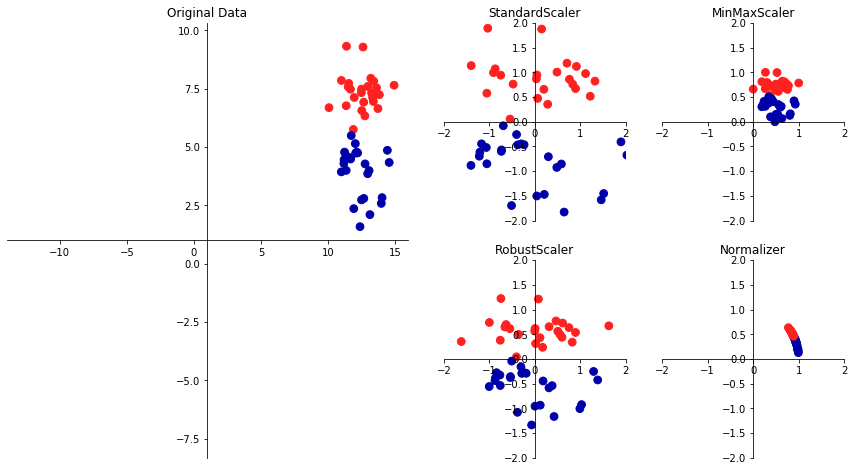

In [3]:
%matplotlib inline
import mglearn
import matplotlib.pyplot as plt
mglearn.plots.plot_scaling()
# 정규화
# 표준편차를 구하는 이유 : 중심으로부터 이격이 얼마나 있는가를 확인하기 위해
# 분석에서는 분산이 커야 주성분 (분산이 크면 왜 이런 분포인지, 어떻게 줄일 수 있는지 연구대상이 됨)
# z-score (관측치-평균)/표준편차
# 표준화 => 표준정규분포 (확률)

In [9]:
import pandas as pd
import numpy as np
df = pd.DataFrame([[1, np.nan, 2],[2,3,5],[np.nan,4,6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [10]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [12]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [13]:
df[3] = np.nan

In [15]:
df.dropna(axis='columns', how='all') #모두가 nan이면 없애라

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [16]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [17]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [18]:
data.fillna(method='ffill') #forward fill

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [19]:
data.fillna(method='bfill') #backward fill

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

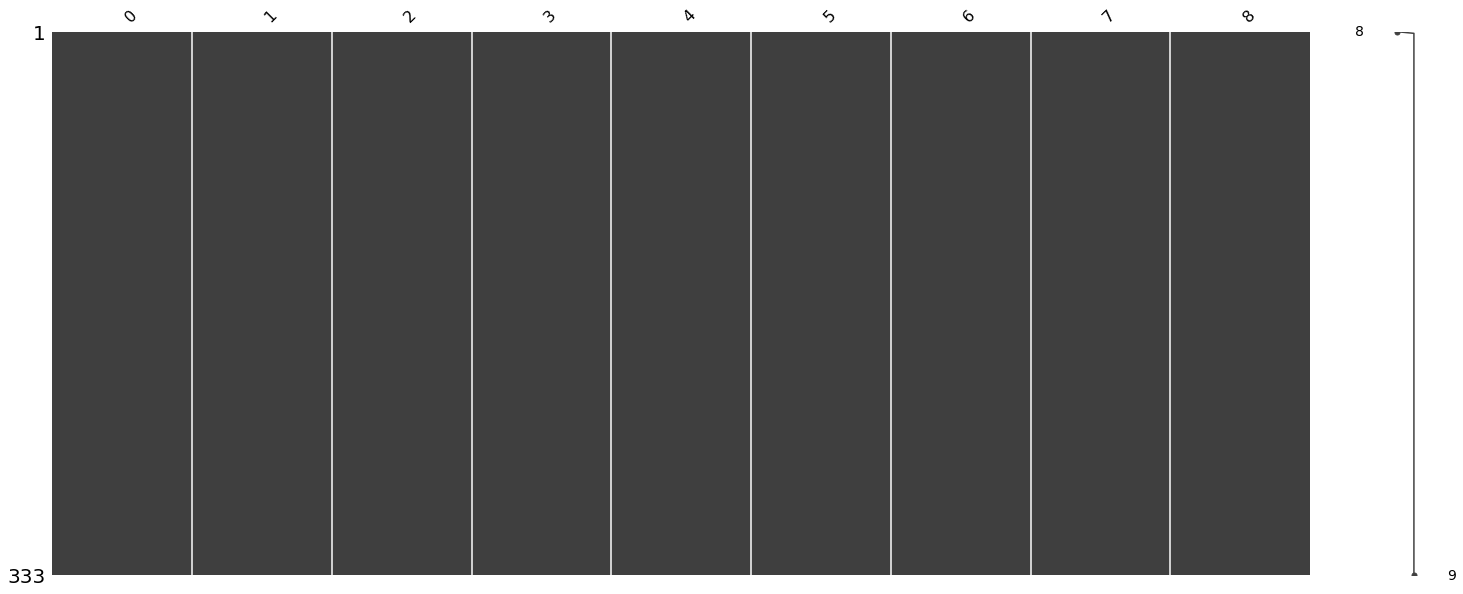

In [21]:
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('diab.csv', header=None)
msno.matrix(df)
plt.show()

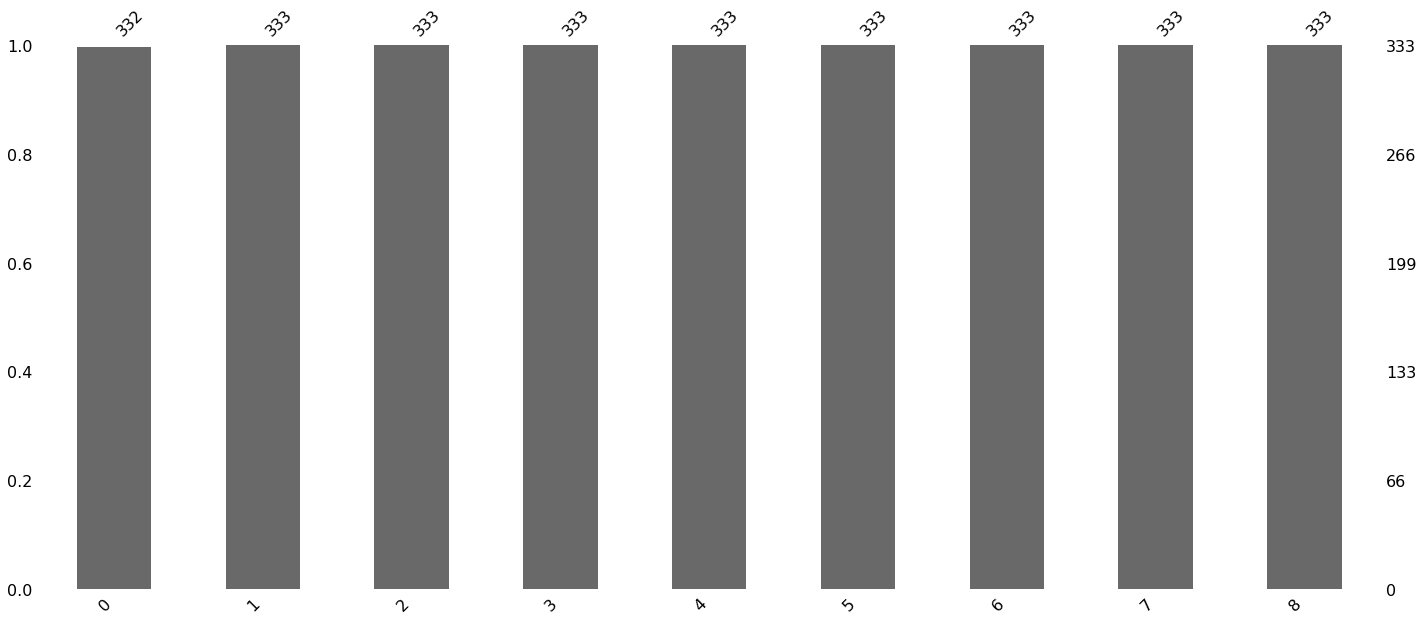

In [22]:
msno.bar(df) # na의 존재를 시각화해서 확인
plt.show()

In [23]:
df.dropna()

,0,1,2,3,4,5,6,7,8
1,1.0,6,148,72,35,33.6,0.627,50,Yes
2,2.0,1,85,66,29,26.6,0.351,31,No
3,3.0,1,89,66,23,28.1,0.167,21,No
4,4.0,3,78,50,32,31,0.248,26,Yes
5,5.0,2,197,70,45,30.5,0.158,53,Yes
...,...,...,...,...,...,...,...,...,...
328,328.0,2,88,58,26,28.4,0.766,22,No
329,329.0,9,170,74,31,44,0.403,43,Yes
330,330.0,10,101,76,48,32.9,0.171,63,No
331,331.0,5,121,72,23,26.2,0.245,30,No


In [45]:
df = pd.DataFrame({'value':np.random.randint(0,100,20)})
print(df)

labels = ["{0}-{1}".format(i, i+9) for i in range(0, 100, 10)]
print(labels)
# 0, 10, 20, ... 100
df['group'] = pd.cut(df.value, range(0, 105, 10), right=False, labels=labels) # 문자열 라벨을 이용해 범주화
# rigth = False : 오른쪽 끝은 제외

    value
0      31
1      57
2      73
3      67
4      51
5      97
6      21
7      50
8      51
9      71
10     96
11     10
12     71
13     15
14     18
15     65
16     97
17     65
18     32
19     74
['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']


In [46]:
df

,value,group
0,31,30-39
1,57,50-59
2,73,70-79
3,67,60-69
4,51,50-59
5,97,90-99
6,21,20-29
7,50,50-59
8,51,50-59
9,71,70-79


In [48]:
# 범주화
raw_cat = pd.Categorical(['a','b','c','a'], categories=['b','c','d'], ordered=False)
raw_cat

[NaN, b, c, NaN]
Categories (3, object): [b, c, d]

In [49]:
# 원핫인코딩 : 선형회귀에서 범주형 변수는 반드시 실행
# 연속형 + 범주형
df = pd.DataFrame({'key':['b','b','a','c','a','b'],
                  'data1':range(6)})
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [59]:
from pandas import Series, DataFrame # 메모리에서 이점이 있는 import 방식 (원하는 것만 로딩)
# dict키는 중복안됨
# DataFrame = dict + 중복을 허용하고 순서를 보장
df1 = DataFrame({'key':['b','b','a','c','a','a','b'],
                'data1':range(7)})
print(df1)

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6


In [60]:
df2 = DataFrame({'key':['a','b','d'], 'data2':range(3)})
print(df2)

  key  data2
0   a      0
1   b      1
2   d      2


In [61]:
print(pd.merge(df1, df2, how='inner')) # 있는 것만!

  key  data1  data2
0   b      0      1
1   b      1      1
2   b      6      1
3   a      2      0
4   a      4      0
5   a      5      0


In [62]:
print(pd.merge(df1, df2, on='key')) # 키값 일치

  key  data1  data2
0   b      0      1
1   b      1      1
2   b      6      1
3   a      2      0
4   a      4      0
5   a      5      0


In [63]:
print(pd.merge(df1, df2, left_on='key', right_on='key')) # 키이름이 다를때는 이렇게 사용

  key  data1  data2
0   b      0      1
1   b      1      1
2   b      6      1
3   a      2      0
4   a      4      0
5   a      5      0


In [64]:
print(pd.merge(df1, df2, how='outer')) # 일치하지 않는 것도 다

  key  data1  data2
0   b    0.0    1.0
1   b    1.0    1.0
2   b    6.0    1.0
3   a    2.0    0.0
4   a    4.0    0.0
5   a    5.0    0.0
6   c    3.0    NaN
7   d    NaN    2.0


In [68]:
# 인덱스 이름 : 계층적 인덱스를 생성
data = DataFrame(np.arange(6).reshape(2,3), index=pd.Index(['Ohio','Colorado'], name='state'),
                columns=pd.Index(['one','two','three'], name='number'))
print(data)

number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5


In [70]:
result = data.stack() # 데이터를 재정비해서 내가 원하는 타입으로 만들기 위해서 / r 에서는 melt
print("분리")
print(result)

분리
state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32


In [67]:
print(result.unstack())

number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5


In [74]:
# 데이터 중복
data = pd.DataFrame({'k1':['one']*3 + ['two']*4,
                    'k2':[1,1,2,3,3,4,4]})
print(data)
print("중복")
print(data.duplicated())
print(data.drop_duplicates()) #원본을 제거하는 게 아님
data1 = data.drop_duplicates()
data['v1']=range(7)
print(data)

    k1  k2
0  one   1
1  one   1
2  one   2
3  two   3
4  two   3
5  two   4
6  two   4
중복
0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool
    k1  k2
0  one   1
2  one   2
3  two   3
5  two   4
    k1  k2  v1
0  one   1   0
1  one   1   1
2  one   2   2
3  two   3   3
4  two   3   4
5  two   4   5
6  two   4   6


In [76]:
data.drop_duplicates(['k1','k2'], keep='last')

,k1,k2,v1
1,one,1,1
2,one,2,2
4,two,3,4
6,two,4,6


In [77]:
data.drop_duplicates(['k1','k2']) # 포인터에 의해서 전달하기 때문에 list 형태로 전달함

,k1,k2,v1
0,one,1,0
2,one,2,2
3,two,3,3
5,two,4,5


In [78]:
data = Series([1., -999., 2., -999., -1000., 3.])
print(data)

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64


In [80]:
print("특정 데이터를 nan으로", data.replace(-999, np.nan))
print("변경", data.replace([-999, -1000], np.nan))
print("짝으로", data.replace([-999, -1000], [np.nan,0]))
print(data.replace({-999:np.nan, -1000:0})) # 키 데이터 형식으로 지정

특정 데이터를 nan으로 0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64
변경 0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64
짝으로 0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64
0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64


In [90]:
# 문제
data = DataFrame(np.arange(12).reshape((3,4)),
                index=['Ohio','Colorado','New York'],
                columns=['one','two','three','four'])

In [82]:
# index의 단어를 모두 대문자로 변경하시오
data.index = data.index.str.upper()

In [92]:
data.index = data.index.map(str.upper)
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [97]:
# Title : titlecase 첫자만 대문자
# https://light-tree.tistory.com/108
data.rename(index=str.title, columns=str.upper)
# 특정 인덱스 수정하고 싶을 때
data.rename(index={'OHIO':'Indiana'}, columns={'three':'peekaboo'})

,one,two,peekaboo,four
Indiana,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [99]:
# 다음 데이터를 18~25, 25~35, 35~60, 60~100 사이의 값으로 범주화하시오
# 나으 풀이
ages = [20,22,25,27,21,24,37,31,61,45,41,32]
labels = ['18-25', '25-35', '35-60', '60-100']
range_list = [18, 25, 35, 60, 100]
age_group = pd.cut(ages, range_list, right=False, labels=labels)
# default는 true (right 값이 포함)
age_group
df = DataFrame(ages, age_group)
df

In [124]:
# 쌤의 풀이
ages = [20,22,25,27,21,24,37,31,61,45,41,32]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats # 범주화한 데이터
# 범주화 => 숫자로 매핑, 종류별로 숫자화
print("code", cats.codes) # 확인은 codes로 할 수 있음
print("범주의 종류는", cats.categories)

code [0 0 0 1 0 0 2 1 3 2 2 1]


In [126]:
# 범주별로 도수분포표를 작성하시오
print("범주별로 카운트 한 결과", pd.value_counts(cats))

범주별로 카운트 한 결과 (18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64


In [ ]:
# 비연속적인 경우
bins = [(0,1),(5,7),(10,14)]
pd.IntervalIndex.from_tuples(bins, closed='right')
x = pd.cut(array, _bins)

In [ ]:
# 예제
def cut(array, bins, labels, closed='right'):
    _bins = pd.IntervalIndex.from_tuples(bins, closed=closed)

    x = pd.cut(array, _bins)
    x.categories = labels
    return x

 

array = [3.5, 1, 0.5, 3]
bins = [(0,1), (1,2), (3,4)]
labels = ['first', 'second', 'third']

df = pd.DataFrame({
    'value': array,
    'category': cut(array, bins, labels, closed='right')
})
df 

In [166]:
df = pd.read_csv('./olive.csv')
df.head()

,Unnamed: 0,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [167]:
#1) 첫번째 컬럼 이름을 ID_area로 지정하시오
df = df.rename(columns = {'Unnamed: 0':'ID_area'})
df

,ID_area,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46
...,...,...,...,...,...,...,...,...,...,...,...
567,568.West-Liguria,3,8,1280,110,290,7490,790,10,10,2
568,569.West-Liguria,3,8,1060,100,270,7740,810,10,10,3
569,570.West-Liguria,3,8,1010,90,210,7720,970,0,0,2
570,571.West-Liguria,3,8,990,120,250,7750,870,10,10,2


In [168]:
#2) regions의 값들을 중복하지 않고 몇 개의 범주인지 확인하시오
df.drop_duplicates('region')
df['region'].unique()

array([1, 2, 3], dtype=int64)

In [177]:
#3) 처음 컬럼(ID_area)에 들어온 이상한 숫자를 제거하시오
a = df['ID_area'].str.split('.')
b = [i[1] for i in a]
df['ID_area'] = b
df

,ID_area,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,North-Apulia,1,1,1051,67,259,7771,672,50,80,46
...,...,...,...,...,...,...,...,...,...,...,...
567,West-Liguria,3,8,1280,110,290,7490,790,10,10,2
568,West-Liguria,3,8,1060,100,270,7740,810,10,10,3
569,West-Liguria,3,8,1010,90,210,7720,970,0,0,2
570,West-Liguria,3,8,990,120,250,7750,870,10,10,2


In [191]:
#4) 산성관련성분인 'palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic'
# 'linoenic', 'arachidic', 'eicosenoic'의 컬럼만 추려서 별도의 sub데이터 프레임(변수이름 dfsub)을 생성하시오
subcols = ['palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic']
dfsub = df[subcols]
dfsub

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1075,75,226,7823,672,36,60,29
1,1088,73,224,7709,781,31,61,29
2,911,54,246,8113,549,31,63,29
3,966,57,240,7952,619,50,78,35
4,1051,67,259,7771,672,50,80,46
...,...,...,...,...,...,...,...,...
567,1280,110,290,7490,790,10,10,2
568,1060,100,270,7740,810,10,10,3
569,1010,90,210,7720,970,0,0,2
570,990,120,250,7750,870,10,10,2


In [193]:
#5) dfsub의 데이터를 모두 100으로 나누어 소수점으로 나타내시오
dfsub/100

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46
...,...,...,...,...,...,...,...,...
567,12.80,1.10,2.90,74.90,7.90,0.10,0.10,0.02
568,10.60,1.00,2.70,77.40,8.10,0.10,0.10,0.03
569,10.10,0.90,2.10,77.20,9.70,0.00,0.00,0.02
570,9.90,1.20,2.50,77.50,8.70,0.10,0.10,0.02


In [190]:
#6) palmitic산과 linolenic산의 분포도를 시각화하시오


Index(['ID_area', 'region', 'area', 'palmitic', 'palmitoleic', 'stearic',
       'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic', 'dfsub'],
      dtype='object')

In [ ]:
#7) groupby를 활용하여 region을 기준으로 묶어서 region_groupby 객체로 생성


In [ ]:
#8) region_groupby에 describe() 메소드 적용하여 출력해보시오



In [195]:
# 쌤의 풀이
# 문제1
path ="./olive.csv"
df = pd.read_csv(path)
df.head(5) # 기본 3형제, 데이터만 보면 자동으로 나와야 함
print(df.dtypes)
df.describe()

Unnamed: 0     object
region          int64
area            int64
palmitic        int64
palmitoleic     int64
stearic         int64
oleic           int64
linoleic        int64
linolenic       int64
arachidic       int64
eicosenoic      int64
dtype: object


,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,1.699301,4.599650,1231.741259,126.094406,228.865385,7311.748252,980.527972,31.888112,58.097902,16.281469
std,0.859968,2.356687,168.592264,52.494365,36.744935,405.810222,242.799221,12.968697,22.030250,14.083295
min,1.000000,1.000000,610.000000,15.000000,152.000000,6300.000000,448.000000,0.000000,0.000000,1.000000
25%,1.000000,3.000000,1095.000000,87.750000,205.000000,7000.000000,770.750000,26.000000,50.000000,2.000000
50%,1.000000,3.000000,1201.000000,110.000000,223.000000,7302.500000,1030.000000,33.000000,61.000000,17.000000
75%,3.000000,7.000000,1360.000000,169.250000,249.000000,7680.000000,1180.750000,40.250000,70.000000,28.000000
max,3.000000,9.000000,1753.000000,280.000000,375.000000,8410.000000,1470.000000,74.000000,105.000000,58.000000


In [196]:
#1) 
df.rename(columns={df.columns[0]:'ID_area'}, inplace=True)
df.columns #컬럼만 확인
df.head()

,ID_area,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [198]:
#2)
df.region.unique()
df.area.unique()
# crosstab : 교차분석표
pd.crosstab(df.area, df.region)

region,1,2,3
area,,,
1,25,0,0
2,56,0,0
3,206,0,0
4,36,0,0
5,0,65,0
6,0,33,0
7,0,0,50
8,0,0,50
9,0,0,51


In [200]:
#3) 데이터 하나에 대해서 어떻게 처리할지만 정해서 apply 해주면 됨!
df["ID_area"] = df["ID_area"].apply(lambda x: x.split('.')[1]) #한줄로 되는 것을 나는...헿

,ID_area,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,North-Apulia,1,1,1051,67,259,7771,672,50,80,46
...,...,...,...,...,...,...,...,...,...,...,...
567,West-Liguria,3,8,1280,110,290,7490,790,10,10,2
568,West-Liguria,3,8,1060,100,270,7740,810,10,10,3
569,West-Liguria,3,8,1010,90,210,7720,970,0,0,2
570,West-Liguria,3,8,990,120,250,7750,870,10,10,2


In [201]:
#4) 
acidlist = ['palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic']
dfsub = df[acidlist]
dfsub.head()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1075,75,226,7823,672,36,60,29
1,1088,73,224,7709,781,31,61,29
2,911,54,246,8113,549,31,63,29
3,966,57,240,7952,619,50,78,35
4,1051,67,259,7771,672,50,80,46


In [202]:
#5)
#dfsub = dfsub/100 요래 해도 되고 ( 다 숫자데이터라 가능함 )
dfsub = df[acidlist].apply(lambda x: x/100) # apply & lambda 함수에 익숙해져야함!
df[acidlist] = dfsub # 계산한 결과 반영

In [203]:
dfsub.head()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


Text(0, 0.5, 'linolenic')

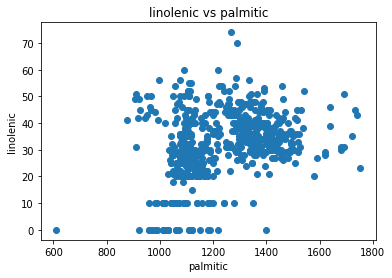

In [205]:
#6) palmitic산과 linolenic산의 분포도를 시각화하시오
fig = plt.figure()
plt.scatter(df['palmitic'], df['linolenic'])
axis = fig.gca()
axis.set_title('linolenic vs palmitic')
axis.set_xlabel('palmitic')
axis.set_ylabel('linolenic')

In [209]:
#7) groupby를 활용하여 region을 기준으로 묶어서 region_groupby 객체로 생성
region_groupby =df.groupby(['region'])
region_groupby.mean()
region_groupby.apply(np.mean) # 함수의 주소를 넘겨줌
# 여러 함수 적용 시 aggFunc


,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,,
1,1.0,2.783282,1332.287926,154.801858,228.773994,7100.009288,1033.498452,38.065015,63.117647,27.321981
2,2.0,5.336735,1111.346939,96.744898,226.183673,7268.020408,1196.530612,27.091837,73.173469,1.938776
3,3.0,8.006623,1094.801325,83.735099,230.801325,7793.052980,727.033113,21.788079,37.576159,1.973510


In [210]:
region_groupby.apply(lambda x : x.mean()) # x가 시리즈 ()를 붙여서 실행시킴

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,,
1,1.0,2.783282,1332.287926,154.801858,228.773994,7100.009288,1033.498452,38.065015,63.117647,27.321981
2,2.0,5.336735,1111.346939,96.744898,226.183673,7268.020408,1196.530612,27.091837,73.173469,1.938776
3,3.0,8.006623,1094.801325,83.735099,230.801325,7793.052980,727.033113,21.788079,37.576159,1.973510


In [208]:
#8) region_groupby에 describe() 메소드 적용하여 출력해보시오
region_groupby.describe()

area                                              palmitic  \
        count      mean       std  min  25%  50%  75%  max    count   
region                                                                
1       323.0  2.783282  0.741054  1.0  2.5  3.0  3.0  4.0    323.0   
2        98.0  5.336735  0.475023  5.0  5.0  5.0  6.0  6.0     98.0   
3       151.0  8.006623  0.820542  7.0  7.0  8.0  9.0  9.0    151.0   

                     ... arachidic        eicosenoic                       \
               mean  ...       75%    max      count       mean       std   
region               ...                                                    
1       1332.287926  ...      69.0  102.0      323.0  27.321981  8.391528   
2       1111.346939  ...      81.0  105.0       98.0   1.938776  0.743582   
3       1094.801325  ...      59.5  100.0      151.0   1.973510  0.729813   

                                      
         min   25%   50%   75%   max  
region                                
1       10.0  22.0  27.0  32.0  58.0  
2        1.0   1.0   2.0   2.0   3.0  
3        1.0   1.0   2.0   2.5   3.0  

[3 rows x 72 columns]